In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load CSV files into dataframes and merge them using the Year field as an index
candidates = pd.read_csv('sig.tse.jus.br/candidates.csv')
candidates.set_index(['year'], inplace=True)
voters = pd.read_csv('sig.tse.jus.br/voters.csv')
voters.set_index(['year'], inplace=True)
election = pd.merge(candidates, voters,  how="outer", on=["year"])

# releases the memory allocated to dataframes
del[[candidates,voters]]

# Convert all fields of type float to integer in the dataframe
for col in election.columns:
    if election[col].dtype == 'float64':
        election[col] = election[col].astype('Int64')

# Sort dataframes data in descending order by year        
election.sort_values(by=['year'], ascending=False, inplace=True)

# Fill NA/NaN values with 0
election.fillna(0, inplace=True)

#Filters data from the years in which municipal elections took place in Brazil
municipal_election = election.filter(items=[2020,2016,2012,2008,2004,2000],axis=0)

# calculates the percentage of data changes from year to year
# and sorts in descending order by year
pct_change_municipal_election = municipal_election.sort_values(by=['year'])\
    .pct_change().sort_values(by=['year'],ascending=False)\
    .rename(columns={"candidates": "pct_change_candidates", "voters": "pct_change_voters"})

# Includes calculations of percentages of data changes in the municipal elections dataframe
municipal_election = municipal_election.merge(pct_change_municipal_election, how="outer", on=["year"])

del[[pct_change_municipal_election]]

#print(municipal_election['pct_change_voters'].fillna(0))

#print(municipal_election)

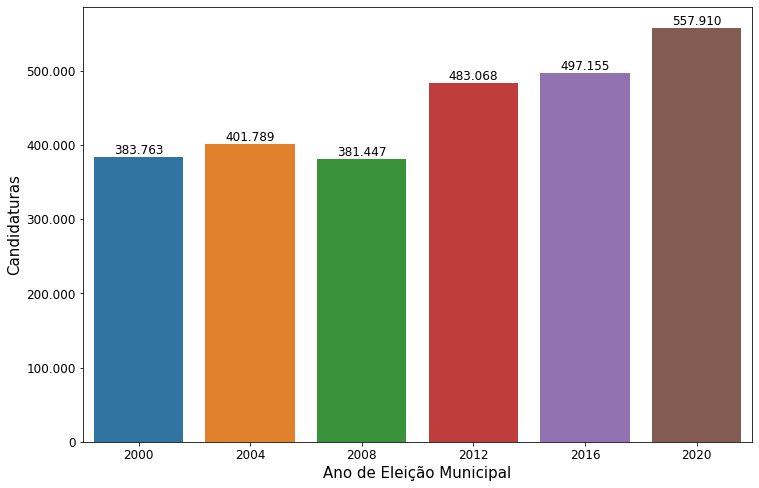

In [4]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election.index, y="candidates", data=municipal_election)

#sns.despine()
#sns.set_style('white')

# Setting the x-acis label and its size
plt.xlabel("Ano de Eleição Municipal", size=15)
# changing the fontsize of xticks
plt.xticks(fontsize=12)

# Setting the y-axis label and its size
plt.ylabel("Candidaturas",size=15)
# changing the fontsize of yticks
plt.yticks(fontsize=12)

splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',').replace(',','.')))

# displays the data values in the graph
#splot.bar_label(splot.containers[0],size=12)
splot.bar_label(splot.containers[0],labels=[f'{x:,.0f}'.replace(',','.') for x in splot.containers[0].datavalues], 
                size=12)

plt.savefig("number_candidates_municipal_elections.jpg",transparent = False)

# print(municipal_election)

# plotting the graph
plt.show()

In [5]:
# Load CSV files into dataframes and merge them using the Year field as an index
electoralJustice = pd.read_csv('br_electoral_JusticeNumbers.csv')

# Select municipal election years in Brazil
municipal_election_JN = electoralJustice[electoralJustice.year.isin([2020,2016,2012,2008,2004,2000])].sort_values(by=['year'], ascending=False)

# Sum the data of the 3 jurisdiction instances
municipal_election_JN_sum = municipal_election_JN.groupby('year').sum()

#municipal_election_JN
#municipal_election_2020 = electoralJustice[electoralJustice.year == 2020]
#municipal_election_2020

In [6]:
# Calculate some indicators of statistics of the Judiciary of Brazil - 
# https://atos.cnj.jus.br/atos/detalhar/110

# Cm – New Cases by Magistrate
municipal_election_JN["Cm"] = municipal_election_JN["new_cases"] / municipal_election_JN["magistrates"]

# Cs = New Cases by Public Servants in the Judiciary Are
municipal_election_JN["Cs"] = municipal_election_JN["new_cases"] / municipal_election_JN["judiciary_civil_servants"]

# K - Total Workload of Magistrates
municipal_election_JN["K"] = ( municipal_election_JN["finished_cases"] 
                               +  municipal_election_JN["pendent_cases"] 
                               +  municipal_election_JN["internal_appeals_judged"] 
                               +  municipal_election_JN["internal_appeals_pendent"]) /  municipal_election_JN["magistrates"] 

# KL - Net Workload of Magistrates
municipal_election_JN["KL"] = ( municipal_election_JN["finished_cases"] 
                               +  municipal_election_JN["pendent_cases"] 
                               -  municipal_election_JN["suspended_cases"]                                
                               +  municipal_election_JN["internal_appeals_judged"] 
                               +  municipal_election_JN["internal_appeals_pendent"]) /  municipal_election_JN["magistrates"] 


# TC - Total Congestion Rate
municipal_election_JN["TC"] = municipal_election_JN["pendent_cases"]  / (municipal_election_JN["finished_cases"] 
                                                                         + municipal_election_JN["pendent_cases"])
# TCL - Net Congestion Rate
municipal_election_JN["TCL"] = (municipal_election_JN["pendent_cases"] - municipal_election_JN["suspended_cases"] ) / (municipal_election_JN["finished_cases"] 
                                                                        + municipal_election_JN["pendent_cases"]
                                                                        - municipal_election_JN["suspended_cases"] )

# DTM - Terminative Process Decisions by Magistrate
municipal_election_JN["DTM"] = municipal_election_JN["decisions_cases"] / municipal_election_JN["magistrates"]

#IPM - Magistrates' Productivity Index
municipal_election_JN["IPM"] = municipal_election_JN["finished_cases"] / municipal_election_JN["magistrates"]

#IPSJud - Productivity Index of Public Servants in the Judiciary Area
municipal_election_JN["IPSJud"] = municipal_election_JN["finished_cases"] / municipal_election_JN["judiciary_civil_servants"]

#IAD - Demand Response Index
municipal_election_JN["IAD"] = municipal_election_JN["finished_cases"] / municipal_election_JN["new_cases"]

#ProcEl - Electronic Process Index
municipal_election_JN["ProcEl"] = municipal_election_JN["eletronic_cases"] / municipal_election_JN["new_cases"]


# municipal_election_JN

# municipal_election_2020 = electoralJustice[electoralJustice.year == 2020]

#municipal_election_2020

In [7]:
#municipal_election_JN_sum

,instance,new_cases,original_cases,appeal_cases,eletronic_cases,finished_cases,pendent_cases,decisions_cases,suspended_cases,internal_appeal,internal_appeals_judged,internal_appeals_pendent,magistrates,judiciary_civil_servants
year,,,,,,,,,,,,,,
2012,6,830563,817770.0,0.0,0.0,462172,363117,525456,0.0,17993,0.0,1883.0,3303,13533.0
2016,6,1057331,1051870.0,43234.0,510.0,678524,449769,640660,43147.0,8917,9977.0,1750.0,3236,14043.0
2020,6,1371530,1367914.0,35337.0,1364991.0,683246,737111,768512,62428.0,21515,19962.0,4834.0,2848,13316.0


In [8]:
# Calculate some indicators of statistics of the Judiciary of Brazil - 
# https://atos.cnj.jus.br/atos/detalhar/110

# Cm – New Cases by Magistrate
municipal_election_JN_sum["Cm"] = municipal_election_JN_sum["new_cases"] / municipal_election_JN_sum["magistrates"]

# Cs = New Cases by Public Servants in the Judiciary Are
municipal_election_JN_sum["Cs"] = municipal_election_JN_sum["new_cases"] / municipal_election_JN_sum["judiciary_civil_servants"]

# K - Total Workload of Magistrates
municipal_election_JN_sum["K"] = ( municipal_election_JN_sum["finished_cases"] 
                               +  municipal_election_JN_sum["pendent_cases"] 
                               +  municipal_election_JN_sum["internal_appeals_judged"] 
                               +  municipal_election_JN_sum["internal_appeals_pendent"]) /  municipal_election_JN_sum["magistrates"] 

# KL - Net Workload of Magistrates
municipal_election_JN_sum["KL"] = ( municipal_election_JN_sum["finished_cases"] 
                               +  municipal_election_JN_sum["pendent_cases"] 
                               -  municipal_election_JN_sum["suspended_cases"]                                
                               +  municipal_election_JN_sum["internal_appeals_judged"] 
                               +  municipal_election_JN_sum["internal_appeals_pendent"]) /  municipal_election_JN_sum["magistrates"] 


# TC - Total Congestion Rate
municipal_election_JN_sum["TC"] = municipal_election_JN_sum["pendent_cases"]  / (municipal_election_JN_sum["finished_cases"] 
                                                                         + municipal_election_JN_sum["pendent_cases"])
# TCL - Net Congestion Rate
municipal_election_JN_sum["TCL"] = (municipal_election_JN_sum["pendent_cases"] - municipal_election_JN_sum["suspended_cases"] ) / (municipal_election_JN_sum["finished_cases"] 
                                                                        + municipal_election_JN_sum["pendent_cases"]
                                                                        - municipal_election_JN_sum["suspended_cases"] )

# DTM - Terminative Process Decisions by Magistrate
municipal_election_JN_sum["DTM"] = municipal_election_JN_sum["decisions_cases"] / municipal_election_JN_sum["magistrates"]

#IPM - Magistrates' Productivity Index
municipal_election_JN_sum["IPM"] = municipal_election_JN_sum["finished_cases"] / municipal_election_JN_sum["magistrates"]

#IPSJud - Productivity Index of Public Servants in the Judiciary Area
municipal_election_JN_sum["IPSJud"] = municipal_election_JN_sum["finished_cases"] / municipal_election_JN_sum["judiciary_civil_servants"]

#IAD - Demand Response Index
municipal_election_JN_sum["IAD"] = municipal_election_JN_sum["finished_cases"] / municipal_election_JN_sum["new_cases"]

#ProcEl - Electronic Process Index
municipal_election_JN_sum["ProcEl"] = municipal_election_JN_sum["eletronic_cases"] / municipal_election_JN_sum["new_cases"]

#print(municipal_election_JN.groupby('year').groups)

municipal_election_JN_sum

,instance,new_cases,original_cases,appeal_cases,eletronic_cases,finished_cases,pendent_cases,decisions_cases,suspended_cases,internal_appeal,...,Cs,K,KL,TC,TCL,DTM,IPM,IPSJud,IAD,ProcEl
year,,,,,,,,,,,,,,,,,,,,,
2012,6,830563,817770.0,0.0,0.0,462172,363117,525456,0.0,17993,...,61.373162,250.430518,250.430518,0.439988,0.439988,159.084469,139.924917,34.151482,0.556456,0.000000
2016,6,1057331,1051870.0,43234.0,510.0,678524,449769,640660,43147.0,8917,...,75.292388,352.292954,338.959518,0.398628,0.374716,197.978986,209.679852,48.317596,0.641733,0.000482
2020,6,1371530,1367914.0,35337.0,1364991.0,683246,737111,768512,62428.0,21515,...,102.998648,507.427317,485.507374,0.518962,0.496847,269.842697,239.903792,51.310153,0.498163,0.995232


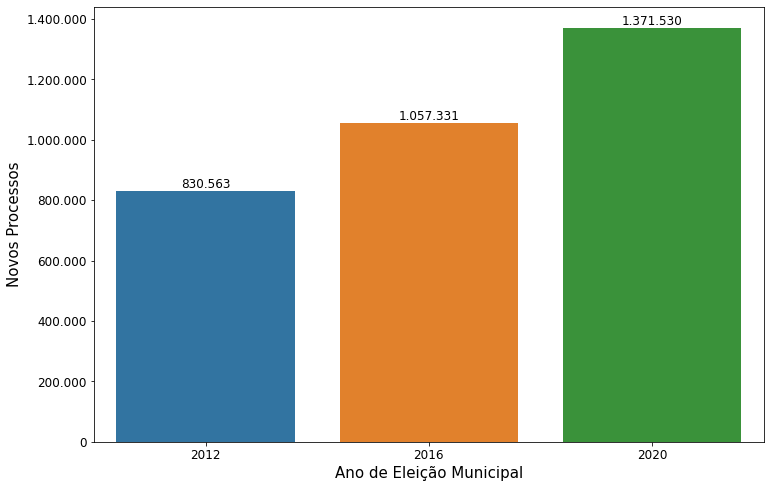

In [9]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election_JN_sum.index, y="new_cases", data=municipal_election_JN_sum)

#sns.despine()
#sns.set_style('white')

# Setting the x-acis label and its size
plt.xlabel("Ano de Eleição Municipal", size=15)
# changing the fontsize of xticks
plt.xticks(fontsize=12)

# Setting the y-axis label and its size
plt.ylabel("Novos Processos",size=15)
# changing the fontsize of yticks
plt.yticks(fontsize=12)

#splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',')))
splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',').replace(',','.')))

# displays the data values in the graph
splot.bar_label(splot.containers[0],labels=[f'{x:,.0f}'.replace(',','.') for x in splot.containers[0].datavalues], 
                size=12)

plt.savefig("new_cases_municipal_elections.jpg",transparent = False)


# plotting the graph
plt.show()

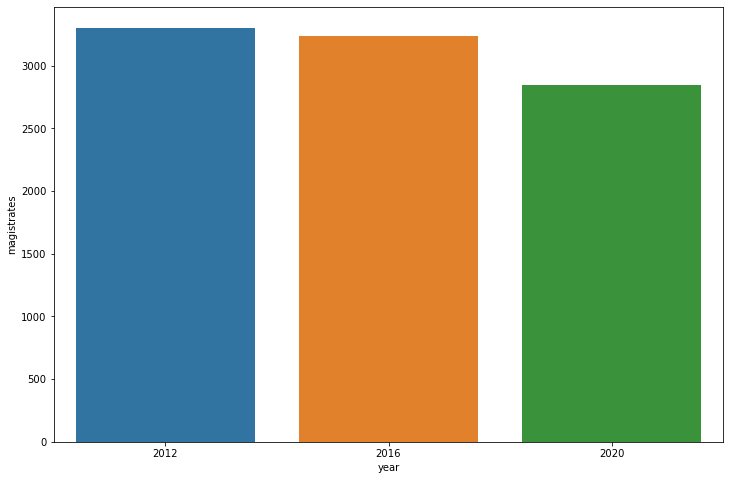

In [10]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election_JN_sum.index, y="magistrates", data=municipal_election_JN_sum)

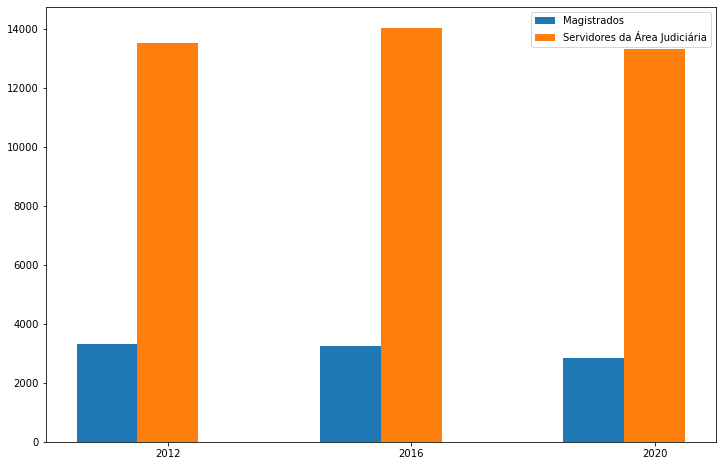

In [11]:
fig = plt.subplots(figsize =(12, 8))
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(len(municipal_election_JN_sum.index))
br2 = [x + barWidth for x in br1]

plt.bar(br1, municipal_election_JN_sum.magistrates,width = barWidth, label='Magistrados')
plt.bar(br2, municipal_election_JN_sum.judiciary_civil_servants,width = barWidth,label='Servidores da Área Judiciária')

plt.xticks([r + barWidth for r in range(len(municipal_election_JN_sum.index))],
        ['2012', '2016', '2020'])


plt.savefig("hr_municipal_elections.jpg",transparent = False)

plt.legend()
plt.show()

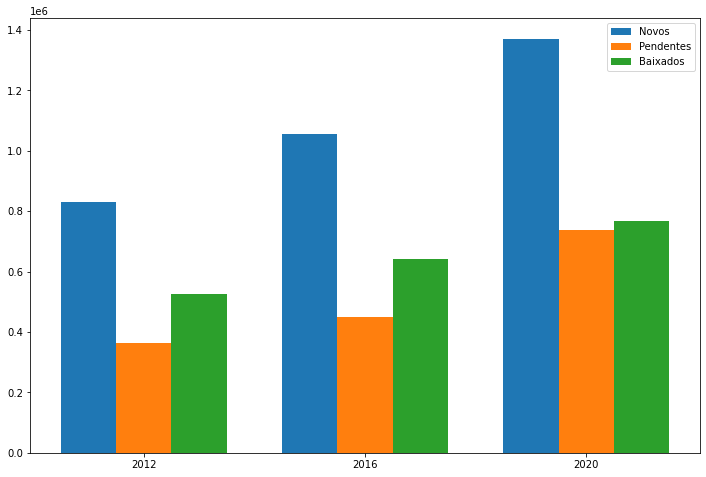

In [12]:

fig = plt.subplots(figsize =(12, 8))
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(len(municipal_election_JN_sum.index))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, municipal_election_JN_sum.new_cases,width = barWidth, label='Novos')
plt.bar(br2, municipal_election_JN_sum.pendent_cases,width = barWidth,label='Pendentes')
plt.bar(br3, municipal_election_JN_sum.decisions_cases,width = barWidth,label='Baixados')

plt.xticks([r + barWidth for r in range(len(municipal_election_JN_sum.index))],
        ['2012', '2016', '2020'])


plt.savefig("cases_municipal_elections.jpg",transparent = False)

plt.legend()
plt.show()
